In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module and assign it to the alias 'plt'
import seaborn as sns # Import seaborn for statistical data visualization

In [14]:
data = pd.read_csv('/content/sales.csv')

In [16]:
data.head()

,Order ID,Order Date,CustomerName,State,City,Details.Order ID,Details.Amount,Details.Profit,Details.Quantity,Details.Category,Details.Sub-Category,Details.PaymentMode
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,B-25601,66,-12,5,Clothing,Stole,UPI
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,B-25601,1275,1148,7,Furniture,Bookcases,EMI
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,B-25601,8,-2,3,Clothing,Hankerchief,Credit Card
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,B-25601,80,-56,4,Electronics,Electronic Games,UPI
4,B-25602,01-04-2018,Vrinda,Maharashtra,Pune,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [18]:
data.shape

(1500, 12)

In [20]:
data.index

RangeIndex(start=0, stop=1500, step=1)

In [21]:
data.columns

Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City',
       'Details.Order ID', 'Details.Amount', 'Details.Profit',
       'Details.Quantity', 'Details.Category', 'Details.Sub-Category',
       'Details.PaymentMode'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Order ID              1500 non-null   object
 1   Order Date            1500 non-null   object
 2   CustomerName          1500 non-null   object
 3   State                 1500 non-null   object
 4   City                  1500 non-null   object
 5   Details.Order ID      1500 non-null   object
 6   Details.Amount        1500 non-null   int64 
 7   Details.Profit        1500 non-null   int64 
 8   Details.Quantity      1500 non-null   int64 
 9   Details.Category      1500 non-null   object
 10  Details.Sub-Category  1500 non-null   object
 11  Details.PaymentMode   1500 non-null   object
dtypes: int64(3), object(9)
memory usage: 140.8+ KB


In [24]:
cols_to_drop = ["Details.Order ID", "Details.Sub-Category"]

In [26]:
# drop the irrevalent cols and print the head of the dataframe
data = data.drop(cols_to_drop, axis=1, errors='ignore')

# print df head
data.head()


,Order ID,Order Date,CustomerName,State,City,Details.Amount,Details.Profit,Details.Quantity,Details.Category,Details.PaymentMode
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,UPI
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275,1148,7,Furniture,EMI
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Credit Card
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,UPI
4,B-25602,01-04-2018,Vrinda,Maharashtra,Pune,2617,1151,4,Electronics,Credit Card


In [27]:
# rename cols
rename_cols = {"Order Date":"Date","CustomerName":"CName","Details.Amount":"Amount","Details.Profit":"Profit","Details.Quantity":"Quantity","Details.Category":"Category","Details.PaymentMode":"MOde"}

In [29]:
data = data.rename(columns=rename_cols)

In [32]:
data.head()

,Order ID,Date,CName,State,City,Amount,Profit,Quantity,Category,MOde
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,UPI
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275,1148,7,Furniture,EMI
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Credit Card
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,UPI
4,B-25602,01-04-2018,Vrinda,Maharashtra,Pune,2617,1151,4,Electronics,Credit Card


In [34]:
#Describe statistics of df
data.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


<Axes: ylabel='Amount'>

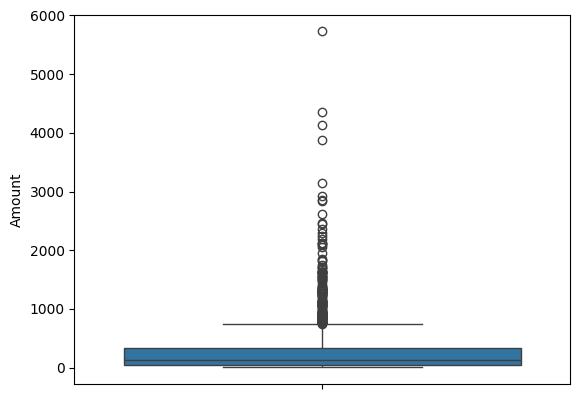

In [35]:
sns.boxplot(data.Amount)

## **Observation**
Here as you see that we got some values near to aprroxx 4000 to 6000. So these values are called outliers. Because there are away from the normal values. Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features

<Axes: ylabel='Profit'>

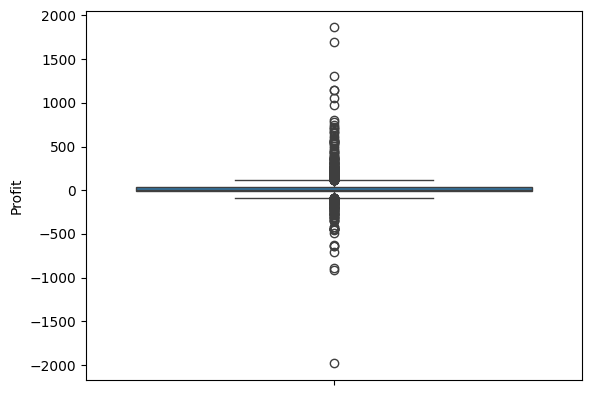

In [36]:
sns.boxplot(data.Profit)

## **observation**
Here are the key observations writen based on this boxplot:

1. Distribution of Profit:

The median profit is close to zero, indicating that most transactions or operations have balanced profits or losses.



2. Spread of Data:

The interquartile range (IQR) shows a significant spread in profit values within the middle 50% of the data.



3. Presence of Outliers:

There are several outliers, both on the positive and negative ends of the profit spectrum, indicating some unusually high profits or losses.


5. Business Implication:

The presence of outliers suggests that some transactions or products may contribute to very high profits or severe losses. These points should be investigated further

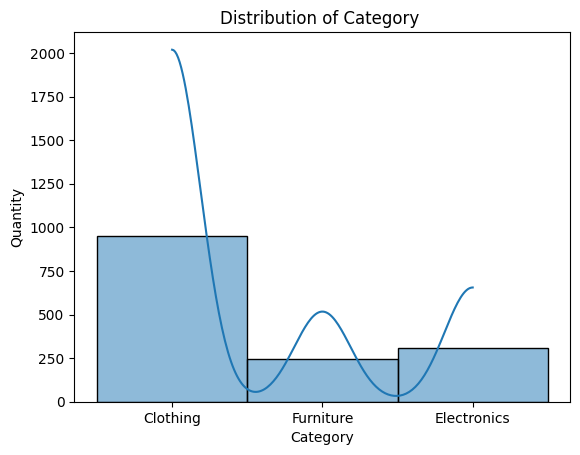

In [45]:
#ploting distplot for variable
sns.histplot(data['Category'], kde=True)
plt.title('Distribution of Category ')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

## **observation**
From the distribution, Clothing has the highest sales quantity among the three categories, followed by Furniture and Electronics. The density plot shows a distinct concentration for Clothing, while Furniture and Electronics have relatively smaller and similar distributions

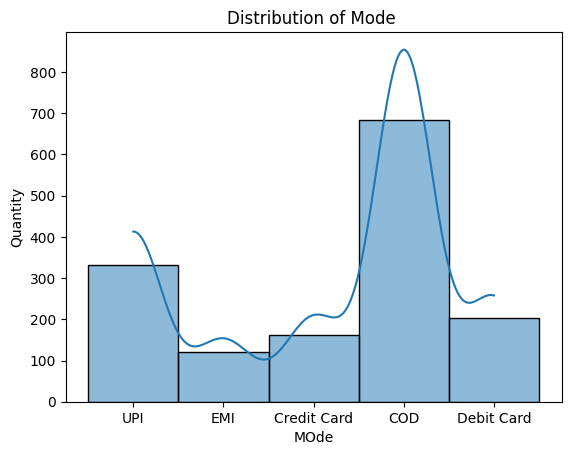

In [47]:
sns.histplot(data['MOde'], kde=True)
plt.title('Distribution of Mode ')
plt.xlabel('MOde')
plt.ylabel('Quantity')
plt.show()

##**observation**

 From the distribution, COD has the highest sales quantity among the three categories, followed by UPI and debit card . The density plot shows a distinct concentration for COD, while UPI and others have relatively smaller and similar distributions.
 It maybe be becouse people prefer Code more then any other payment methods .
 It maybe not a good sign of trust from the end of customer .


<Axes: xlabel='Profit', ylabel='count'>

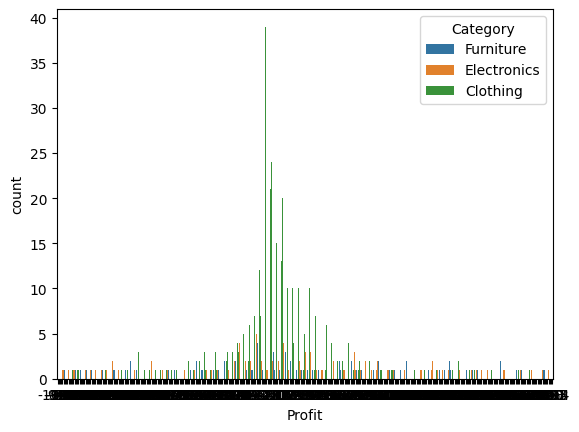

In [50]:
sns.countplot(x='Profit', hue='Category', data=data)

<Axes: xlabel='Quantity', ylabel='Profit'>

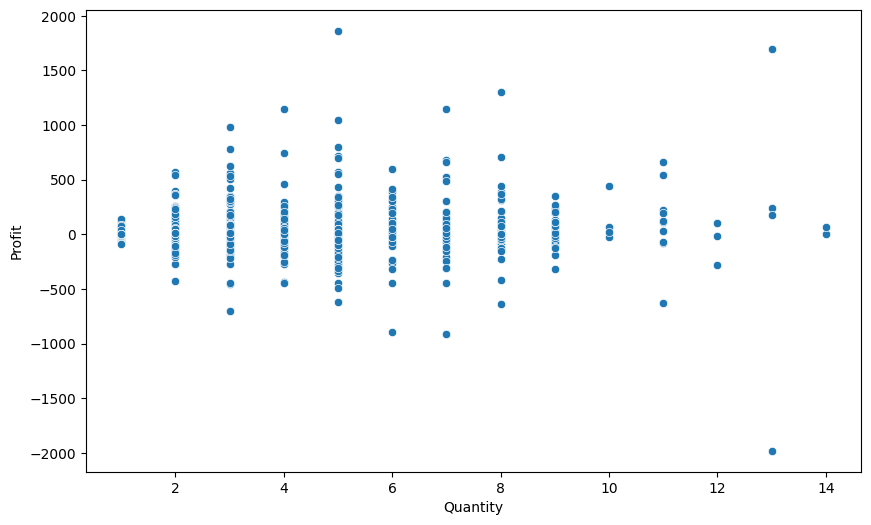

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Profit', data=data)


## **Observation**
here is also outliner are present in both positive and negative side which makes busness in between loss and profit . more over its not a good sign.

<Axes: xlabel='Amount', ylabel='State'>

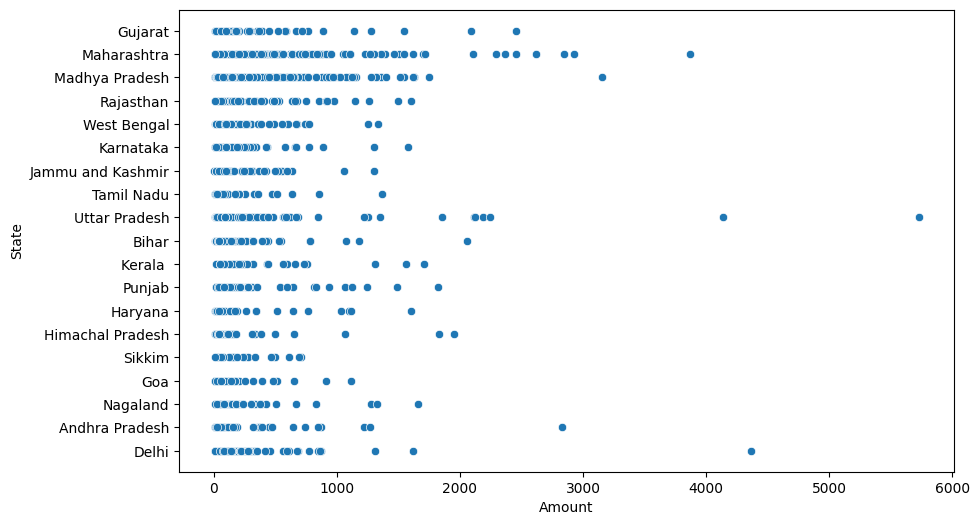

In [55]:
fig, ax = plt.subplots(figsize=(10,6))

# plot scatterplot on hp and price
sns.scatterplot(x='Amount', y='State', data=data)

### **Observation**

1.Distribution of Sales Across States:

Certain states like Gujarat, Maharashtra, and Madhya Pradesh show a higher concentration of orders with varying amounts.
Other states like Nagaland, Sikkim, and Goa have fewer data points, indicating fewer transactions or lower representation.

2.Amount Spread:

Most transactions across states are clustered within lower "Amount" ranges (below 2000), though some states show higher amounts up to 6000.


3.State-Level Variations:

States like Gujarat and Maharashtra have a broader range of transaction amounts, whereas smaller states (e.g., Sikkim, Nagaland) have a limited range.

4.Outliers:

A few states (e.g., Maharashtra or Gujarat) show transactions with exceptionally high amounts, suggesting possible outliers or significant purchases.
Further analysis could explore why certain states have higher transaction amounts or more orders. This might involve examining demographic, economic, or operational factors.


In [58]:
data['Profit'].skew()

1.591882239284279

In [59]:
data['Quantity'].skew()

1.264721549485577

## Observation
both the variables are possitively skewed . which means the distribution of both of the variables are not symmetrical and has longer tail on right side .
some factors to be consider ;
1.outliners are present
2. mean is typically greater than median ehich is typically greater than mode .both of them are unevenly distributed.

## Conclussion--
EDA Conclusion:

The business appears to be operational, but with fluctuating profitability. Sales data reveals instances of both profit and loss, indicating potential areas for improvement in cost management or pricing strategies. The presence of outliers in profit suggests occasional large fluctuations which require further investigation. Customer preference for Cash on Delivery (COD) is evident. Both sales quantity and profit show a positive skew, meaning that while there are frequent smaller transactions, a few larger sales contribute significantly to overall revenue and profit.

Further Recommendations:

Investigate Outliers: Identify and analyze the outliers in profit to understand their causes and potential impact on overall business performance.
Optimize Pricing and Cost Management: Focus on strategies to minimize losses and improve profit margins, particularly for smaller transactions.
Leverage COD Preference: Capitalize on the customer preference for COD to potentially increase sales.
Analyze Skewness: Understand the implications of the positive skew in quantity and profit. Consider strategies to increase the frequency of larger transactions or optimize profitability for the smaller, more frequent sales.
This conclusion summarizes the key findings of your EDA and provides actionable recommendations for further investigation and potential improvements to the business. Remember to conduct more in-depth analysis to validate these findings and guide decision-making.